In [14]:
import polars as pl
import pandas as pd
import geopandas as gpd
import datetime

In [2]:
# odsの中身の確認
ods = pl.read_parquet('/Users/nagampere/File/Python/sayori/od_yonezawa_based_stop_id.parquet/part-00002-tid-7597389897474560305-7a8f602a-b508-4487-af54-55d4c76e5e85-38-1.c000.snappy.parquet')
# ods[2,0] = "53_02"
# ods[2,1] = "56_02"
# ods[8,0] = "52_02"
# ods[8,1] = "86_02"	
# ods[9,0] = "12_02"
# ods[9,1] = "28_02"
ods.head(10)

d_key,o_key,datetime,hour,move_count,weekday_holiday_flag,o_mesh_4,o_stop_name,o_agency,d_mesh_4,d_stop_name,d_agency
str,str,datetime[ns],i32,i32,str,i64,str,str,i64,str,str
"""54_01""","""70_01""",2022-05-02 00:00:00,12,1,"""w""",564070091,"""金池一丁目""","""yonezawa_city""",564060873,"""西部こども園前""","""yonezawa_city"""
"""41_02""","""48_02""",2022-05-13 00:00:00,13,1,"""h""",564060982,"""上杉神社前""","""yonezawa_city""",564060893,"""県営相生ｱﾊﾟｰﾄ東""","""yonezawa_city"""
"""56_02""","""53_02""",2022-05-04 00:00:00,10,1,"""w""",564060874,"""愛宕小前""","""yonezawa_city""",564060973,"""西部ｺﾐｭﾆﾃｨｾﾝﾀｰ前""","""yonezawa_city"""
"""64_01""","""46_02""",2022-05-13 00:00:00,15,1,"""h""",564060884,"""大町一丁目""","""yonezawa_city""",564070083,"""信夫町""","""yonezawa_city"""
"""53_02""","""1_01""",2022-05-30 00:00:00,7,1,"""w""",564061384,"""米沢スキー場前""","""yonezawa_city""",564060874,"""愛宕小前""","""yonezawa_city"""
"""34_01""","""80_02""",2022-05-07 00:00:00,22,1,"""h""",564060693,"""太田町五丁目""","""yonezawa_city""",564070082,"""中央三丁目""","""yonezawa_city"""
"""52_01""","""58_01""",2022-05-26 00:00:00,21,1,"""h""",564070072,"""すこやかセンター""","""yonezawa_city""",564060872,"""二中前""","""yonezawa_city"""
"""12_02""","""27_02""",2022-05-31 00:00:00,17,1,"""w""",564060992,"""米沢営業所""","""yonezawa_city""",564061831,"""万世小学校前""","""yonezawa_city"""
"""86_02""","""52_02""",2022-05-16 00:00:00,16,1,"""w""",564060872,"""二中前""","""yonezawa_city""",564060884,"""九里学園前""","""yonezawa_city"""


In [92]:
import json
ods_parameters = ods.with_columns(
    pl.struct(
        pl.concat_list(pl.col('o_key')).alias("origin_stop_ids"),
        # pl.concat_list(pl.lit("26_01")).alias("origin_stop_ids"),
        pl.concat_list(pl.col('d_key')).alias("destination_stop_ids"),
        # pl.concat_list(pl.lit("42_01")).alias("destination_stop_ids"),
        pl.col('datetime').cast(pl.Date).cast(str).alias("specified_date"),
        # pl.lit("2022-06-20").alias("specified_date"),
        (pl.col('hour')*10000).cast(int).alias("specified_secs"),
        # (pl.lit('40000')).alias("specified_secs"),
        pl.lit(3).cast(int).alias("transfers_limit"),
        pl.lit(True).alias("is_reverse_search"),
        pl.lit(None).cast(str).alias("available_trip_ids")
    ).alias("parameters")
)
print(ods_parameters[0,12])


{'origin_stop_ids': ['70_01'], 'destination_stop_ids': ['54_01'], 'specified_date': '2022-05-02', 'specified_secs': 120000, 'transfers_limit': 3, 'is_reverse_search': True, 'available_trip_ids': None}


In [93]:
# transferデータの修正
stops = pd.read_csv('data_yonezawa/stops.txt')

In [94]:
pdf_stops = gpd.GeoDataFrame(
    stops,
    geometry=gpd.GeoSeries.from_xy(stops['stop_lon'], 
                                   stops['stop_lat'],
                                   crs="EPSG:4326")
).to_crs(6678)

df_stops = pd.DataFrame()
for i, se in pdf_stops.iterrows():
    df_stops = pd.concat([
        df_stops,
        pd.DataFrame({
            "from_stop_id": [se["stop_id"]]*len(pdf_stops),
            "to_stop_id": [x for x in pdf_stops["stop_id"]],
            "distance": pdf_stops["geometry"].apply(lambda x: x.distance(se["geometry"])).tolist()
        })
    ])

df_stops = df_stops.query("distance < 80*5")
df_stops = df_stops.query("from_stop_id != to_stop_id")

In [95]:
transfers = pd.DataFrame()
transfers['from_stop_id'] = df_stops['from_stop_id'].astype(str)
transfers['to_stop_id'] = df_stops['to_stop_id'].astype(str)
transfers['transfer_type'] = 2
transfers['transfer_type'] = transfers['transfer_type'].astype('i4')
transfers['min_transfer_time'] = df_stops['distance'] // 80 * 60
transfers['min_transfer_time'] = transfers['min_transfer_time'].apply(lambda x: 1 if x == 0 else x)
transfers['min_transfer_time'] = transfers['min_transfer_time'].astype('i4')
transfers.reset_index(inplace=True,
                      drop=True)
transfers.to_parquet('data_yonezawa/transfers.parquet')
transfers.to_csv('transfers.csv')
transfers.dtypes

from_stop_id         object
to_stop_id           object
transfer_type         int32
min_transfer_time     int32
dtype: object

In [96]:
display(transfers[transfers["min_transfer_time"]!=1])

,from_stop_id,to_stop_id,transfer_type,min_transfer_time
3,11_01,12_01,2,180
4,11_01,12_02,2,180
6,11_02,12_01,2,180
7,11_02,12_02,2,180
8,12_01,11_01,2,180
...,...,...,...,...
718,87_02,30_01,2,180
719,87_02,30_02,2,180
720,87_02,31_01,2,60
721,87_02,48_02,2,240


In [97]:
df_stop_times = pd.read_csv('data_yonezawa/stop_times.txt')

def time_to_sec(x):
    time = datetime.datetime.strptime(x,'%H:%M:%S')
    sec = time.hour*60*60 + time.minute*60 + time.second
    return sec


df_stop_times['arrival_time'] = df_stop_times['arrival_time'].apply(lambda x: time_to_sec(x)).astype('i4')
df_stop_times['departure_time'] = df_stop_times['departure_time'].apply(lambda x: time_to_sec(x)).astype('i4')
df_stop_times['stop_sequence'] = df_stop_times['stop_sequence'].astype('i8')
df_stop_times['pickup_type'] = df_stop_times['pickup_type'].astype('i4')
df_stop_times['drop_off_type'] = df_stop_times['drop_off_type'].astype('i4')
df_stop_times = df_stop_times.drop(columns=['stop_headsign','shape_dist_traveled'])
df_stop_times.to_parquet('data_yonezawa/stop_times.parquet', index=False)
df_stop_times.dtypes

trip_id           object
arrival_time       int32
departure_time     int32
stop_id           object
stop_sequence      int64
pickup_type        int32
drop_off_type      int32
dtype: object

In [98]:
import os
import time
import json

from sayori.raptor import search_p2p_geojson, search_p2p_path
from sayori.models import FeedPath, Feed

In [99]:
def load_data_from_path() -> FeedPath:
    feed_path = {
        "stops": os.environ.get("STOPS_PATH"),
        "trips": os.environ.get("TRIPS_PATH"),
        "stop_times": os.environ.get("STOP_TIMES_PATH"),
        "transfers": os.environ.get("TRANSFERS_PATH"),
        "calendar": os.environ.get("CALENDAR_PATH"),
    }

    return FeedPath.parse_obj(feed_path)

feed_path = load_data_from_path()
feed = Feed.from_feed_path(feed_path)
feed.stop_times

array([('1全日夏期_07時00分_系統4181', 25200, 25200, '26_01',  1, 0, 1),
       ('1全日夏期_07時00分_系統4181', 25260, 25260, '38_01',  2, 0, 0),
       ('1全日夏期_07時00分_系統4181', 25320, 25320, '39_01',  3, 0, 0), ...,
       ('6全日_17時25分_系統4162', 65220, 65220, '71_02', 33, 0, 0),
       ('6全日_17時25分_系統4162', 65340, 65340, '25_01', 34, 0, 0),
       ('6全日_17時25分_系統4162', 65460, 65460, '26_01', 35, 1, 0)],
      dtype=[('trip_id', 'O'), ('arrival_time', '<i4'), ('departure_time', '<i4'), ('stop_id', 'O'), ('stop_sequence', '<i8'), ('pickup_type', '<i4'), ('drop_off_type', '<i4')])

In [168]:
# sayoriエンジンの適用
n=10000
ods_parameters_res = ods_parameters.head(n).with_columns(
    pl.col("parameters").apply(lambda x:dict(search_p2p_geojson(feed,x))).alias("res")
)
res = []
for i in ods_parameters.head(n)["parameters"]: 
    x = search_p2p_geojson(feed,i)
    if x == None: continue
    else: res.append({
        'time_to_reach': x['features'][0]['properties']['time_to_reach']
    })
df_res = pd.DataFrame(res)

In [170]:
len(res)

5377

array([[<Axes: title={'center': 'time_to_reach'}>]], dtype=object)

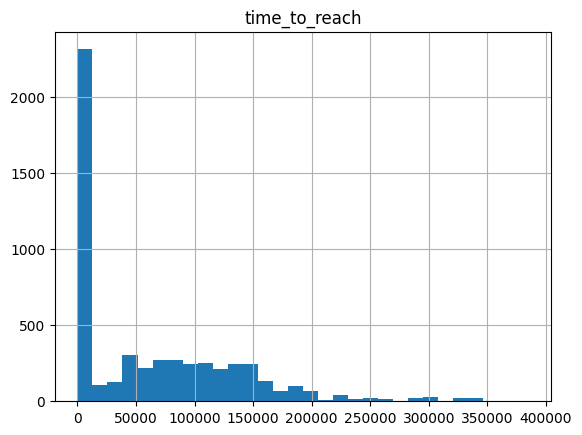

In [169]:
df_res.hist(bins=30)

In [101]:
# 正答率
print(len(ods_parameters_res))
print(len(ods_parameters_res.filter(pl.col("res")!='None')))

100
57


In [102]:
# チェック
ods_parameters_res.head(10)
# [4]: "米沢スキー場前"発は始発が7:35なので、ヒットしない?

d_key,o_key,datetime,hour,move_count,weekday_holiday_flag,o_mesh_4,o_stop_name,o_agency,d_mesh_4,d_stop_name,d_agency,parameters,res
str,str,datetime[ns],i32,i32,str,i64,str,str,i64,str,str,struct[7],str
"""54_01""","""70_01""",2022-05-02 00:00:00,12,1,"""w""",564070091,"""金池一丁目""","""yonezawa_city""",564060873,"""西部こども園前""","""yonezawa_city""","{[""70_01""],[""54_01""],""2022-05-02"",120000,3,true,null}","""{'type': 'Feat…"
"""41_02""","""48_02""",2022-05-13 00:00:00,13,1,"""h""",564060982,"""上杉神社前""","""yonezawa_city""",564060893,"""県営相生ｱﾊﾟｰﾄ東""","""yonezawa_city""","{[""48_02""],[""41_02""],""2022-05-13"",130000,3,true,null}","""{'type': 'Feat…"
"""56_02""","""53_02""",2022-05-04 00:00:00,10,1,"""w""",564060874,"""愛宕小前""","""yonezawa_city""",564060973,"""西部ｺﾐｭﾆﾃｨｾﾝﾀｰ前""","""yonezawa_city""","{[""53_02""],[""56_02""],""2022-05-04"",100000,3,true,null}","""{'type': 'Feat…"
"""64_01""","""46_02""",2022-05-13 00:00:00,15,1,"""h""",564060884,"""大町一丁目""","""yonezawa_city""",564070083,"""信夫町""","""yonezawa_city""","{[""46_02""],[""64_01""],""2022-05-13"",150000,3,true,null}","""{'type': 'Feat…"
"""53_02""","""1_01""",2022-05-30 00:00:00,7,1,"""w""",564061384,"""米沢スキー場前""","""yonezawa_city""",564060874,"""愛宕小前""","""yonezawa_city""","{[""1_01""],[""53_02""],""2022-05-30"",70000,3,true,null}","""None"""
"""34_01""","""80_02""",2022-05-07 00:00:00,22,1,"""h""",564060693,"""太田町五丁目""","""yonezawa_city""",564070082,"""中央三丁目""","""yonezawa_city""","{[""80_02""],[""34_01""],""2022-05-07"",220000,3,true,null}","""None"""
"""52_01""","""58_01""",2022-05-26 00:00:00,21,1,"""h""",564070072,"""すこやかセンター""","""yonezawa_city""",564060872,"""二中前""","""yonezawa_city""","{[""58_01""],[""52_01""],""2022-05-26"",210000,3,true,null}","""{'type': 'Feat…"
"""12_02""","""27_02""",2022-05-31 00:00:00,17,1,"""w""",564060992,"""米沢営業所""","""yonezawa_city""",564061831,"""万世小学校前""","""yonezawa_city""","{[""27_02""],[""12_02""],""2022-05-31"",170000,3,true,null}","""None"""
"""86_02""","""52_02""",2022-05-16 00:00:00,16,1,"""w""",564060872,"""二中前""","""yonezawa_city""",564060884,"""九里学園前""","""yonezawa_city""","{[""52_02""],[""86_02""],""2022-05-16"",160000,3,true,null}","""{'type': 'Feat…"


In [103]:
ods_parameters_res.drop("parameters").write_csv("ods.csv")